# CreditCardFraud Detection Visualization using T-SNE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

Observation: <br>
1)There are 284807 data points i.e this many no.of transactions<br>
2)There are 31 Features i.e 31 dimensions

## Description

Time -> Its the seconds elapsed between each transaction and the first transaction in the dataset
<br>
Class: 1 -> fraud, 0 -> no harm

### Considering 50086 Data Points

In [4]:
s1 = df[df['Class']==0]
sampleClass1=s1[0:50000];

s2 = df[df['Class']==1]
sampleClass2=s2[0:86];

sample = sampleClass1.append(sampleClass2)
sample.shape


(50086, 31)

In [5]:
classes = sample['Class']

sample = sample.drop("Class",axis=1)
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [6]:
from sklearn.preprocessing import StandardScaler
stdzidData = StandardScaler().fit_transform(sample)
stdzidData.shape

(50086, 30)

In [ ]:
from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

In [7]:
# getting tsne_df from the pickle file into 
# which we have loaded in the above step

pickle_in=open("50KDataPointsTsne.pickle","rb")
tsne_df = pickle.load(pickle_in)

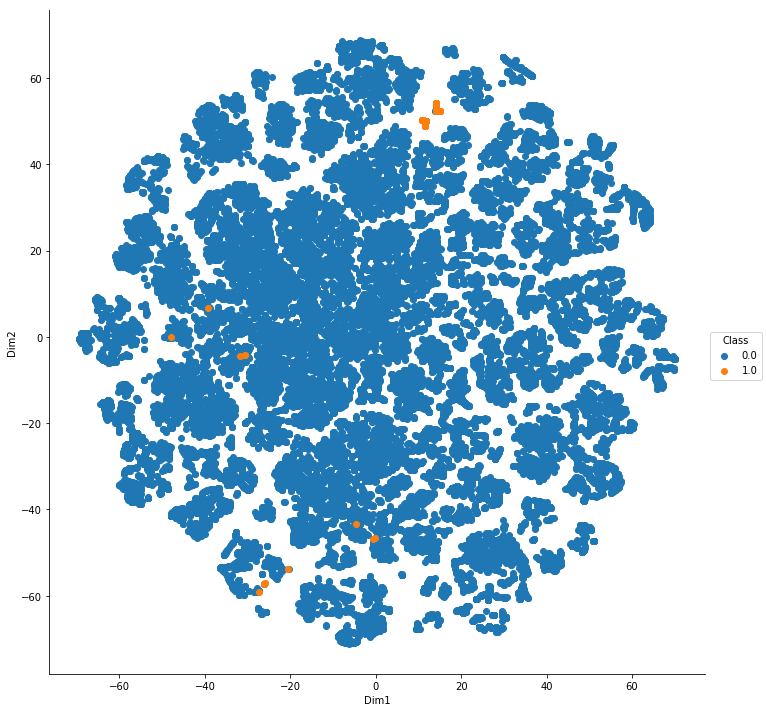

In [8]:
sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()

### Perplexity = 100 

In [13]:
s1 = df[df['Class']==0]
sampleClass1=s1[0:5000];

s2 = df[df['Class']==1]
sampleClass2=s2[0:9];

sample = sampleClass1.append(sampleClass2)
sample.shape



(5009, 31)

In [14]:
classes = sample['Class']

sample = sample.drop("Class",axis=1)
sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [15]:
from sklearn.preprocessing import StandardScaler
stdzidData = StandardScaler().fit_transform(sample)
stdzidData.shape

(5009, 30)

### Perplexity=20

In [18]:
from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0,perplexity=20, n_iter=5000)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

(3, 5009)


,Dim1,Dim2,Class
0,0.575464,42.368244,0.0
1,117.171600,-44.305717,0.0
2,-3.074323,-52.404091,0.0
3,33.981457,-2.546606,0.0
4,-0.782740,28.125124,0.0


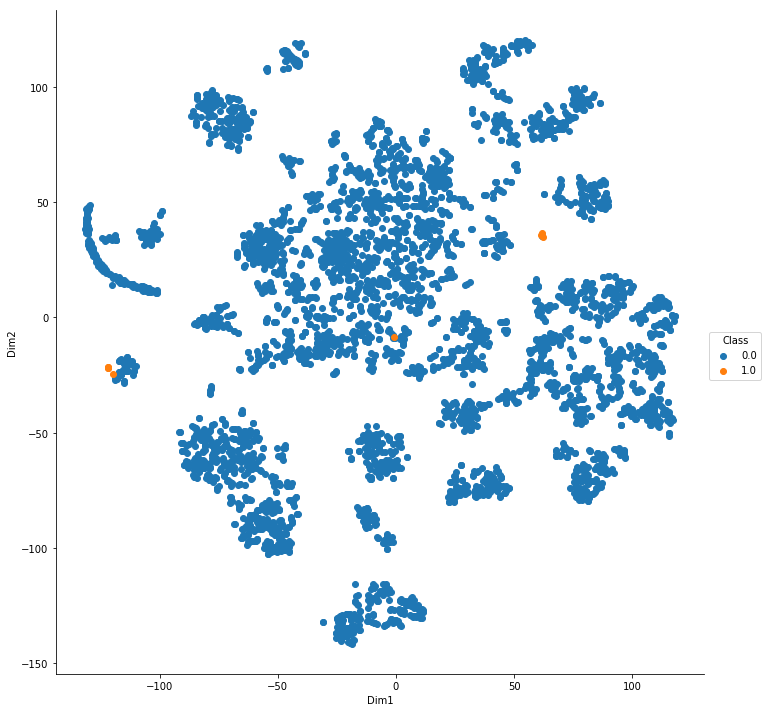

In [19]:
sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()

### Perplexity =10 and iter=2000

In [20]:
from sklearn.manifold import TSNE


model = TSNE(n_components=2, random_state=0,perplexity=10, n_iter=2000)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

(3, 5009)


,Dim1,Dim2,Class
0,7.428113,11.981552,0.0
1,81.495552,-98.177994,0.0
2,-41.879108,-0.417826,0.0
3,-0.314163,-32.616764,0.0
4,4.384876,32.115753,0.0


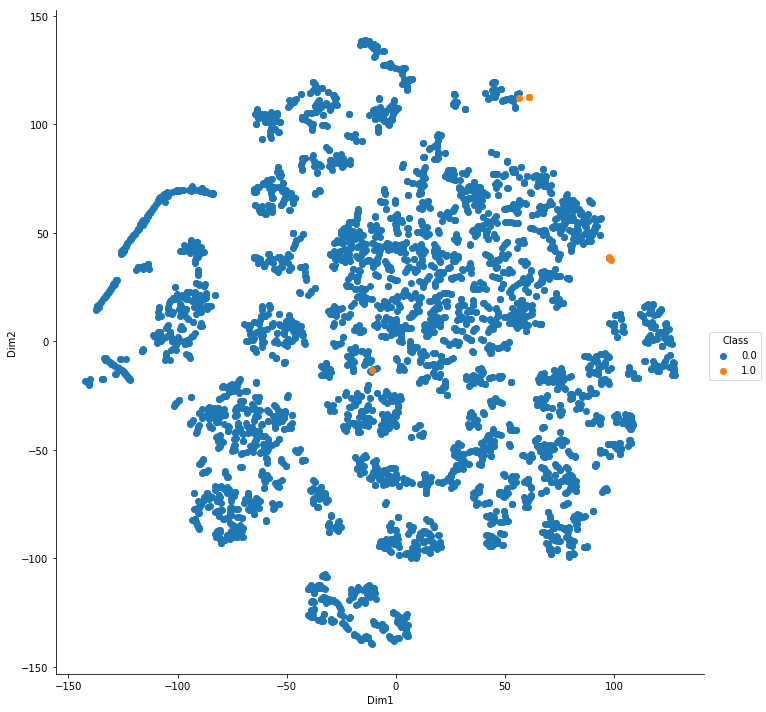

In [21]:
sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()

### Perplexity = 5

(3, 5009)


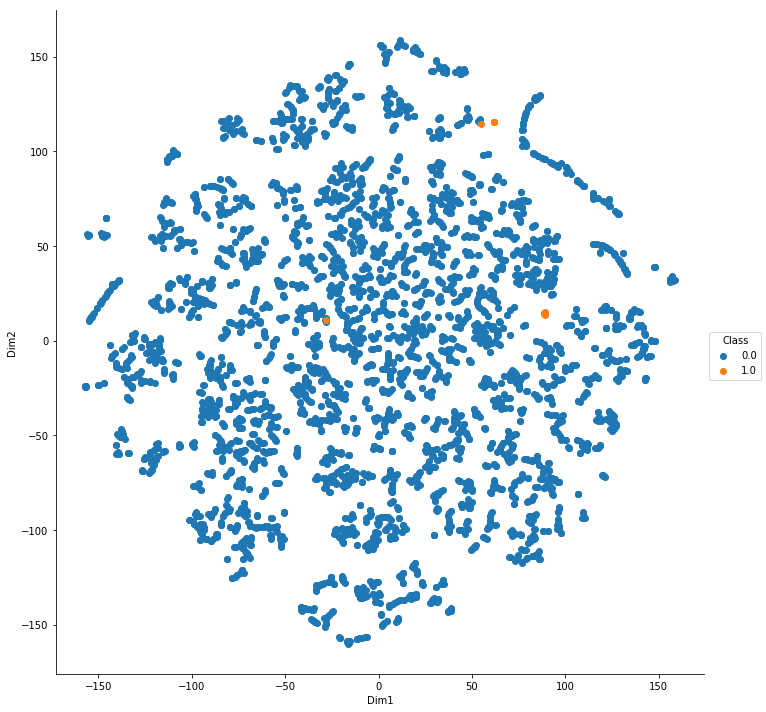

In [23]:
model = TSNE(n_components=2, random_state=0,perplexity=5, n_iter=2000)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()

### Perplexity =20

(3, 5009)


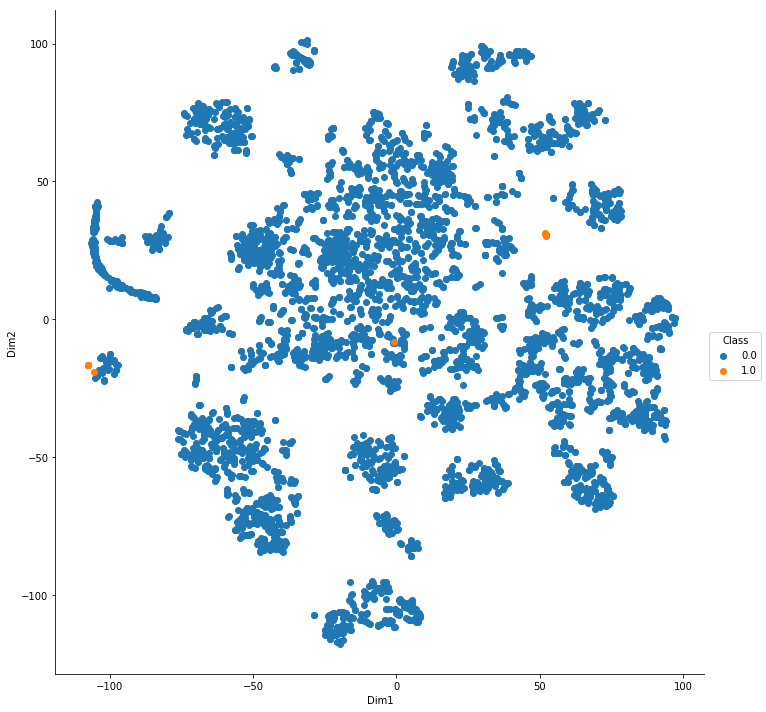

In [24]:
model = TSNE(n_components=2, random_state=0,perplexity=20, n_iter=2000)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()

### Perplexity = 50

(3, 5009)


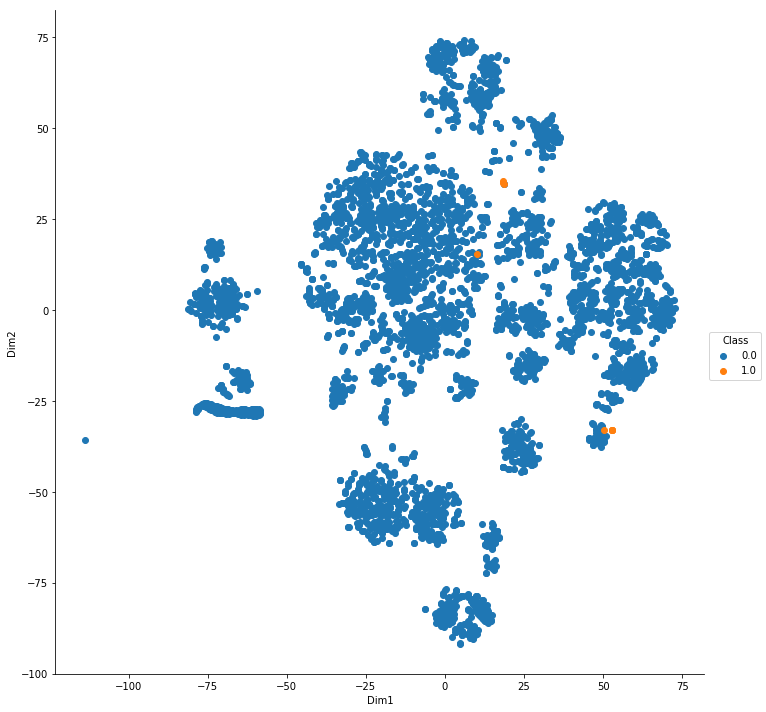

In [26]:
model = TSNE(n_components=2, random_state=0,perplexity=50, n_iter=2000)



tsneData = model.fit_transform(stdzidData)

tsneData = np.vstack((tsneData.T,classes)).T

print(tsneData.T.shape)

tsne_df = pd.DataFrame(data = tsneData,columns=("Dim1","Dim2","Class"))
tsne_df.head()

sns.FacetGrid(tsne_df,hue="Class",size=10).map(plt.scatter,"Dim1","Dim2").add_legend()

plt.show()

# Summary:
<br> Here We have used the T-SNE technique to visualize the Transactions of type Class 0 and 1, by reducing no.of features from 30 to 2 with T-SNE.<br>

Here We have illustrated the plots by considering different no.of samples with different sample sizes with Different Perplexities and No.of Iterations.<br>

At Perplexity 5,20 and no.of iterations 2000 The graph is some what acceptable.